# The Income Fluctuation Problem

### This problem is the consumer problem (partial equilibrium) of an Aiyagari (1994) economy

Based on QuantEcon Income Fluctuation Problem lecture: https://python.quantecon.org/ifp.html

The income fluctuation problem reads:

\begin{align}
\max_{(a_t)_{t=0}^\infty} \ & E \ \sum_{t=0}^\infty \beta^t u(c_t)\\
    \text{s.t.} \ & c_t + a_{t+1} = R_t a_t + z_t\\
    & a_0, z_0 \ \text{given}\\
    & Pr(z_{t+1} = z \lvert z_{t}) = \Pi(z \lvert z_{t})\\
    & a_t \geq -b \\
    & c_t \geq 0
\end{align}

### Recursive formulation

Since the shocks $z$ follow a Markov process, we can write the problem in recursive form as follows:

\begin{align}
v(a, z) = \max_{a'} \ & u(c) + \beta \int [v(a', z') \ \lvert \ z] \ \Pi(dz' \lvert z)\\
    \text{s.t.} \ & c + a' = R a + z\\
                   & a' \geq b
\end{align}



#### With iid shocks

Note that if the $z$ shocks were iid, then only the net worth would matter and so the problem could be written recursively in terms on only one state variable (denoted $w$ for net worth) as follows:

\begin{align}
v(w) = \max_{c} \ & u(c) + \beta \int [v(w') \ \lvert \ z] \ \Pi(dz' \lvert z)\\
    \text{s.t.} \ & w' = R \ (w - c) + z'\\
                  & c\leq w + b
\end{align}
where $w := R \ a + z$ so $a' = w - c$ and hence the evolution of net worth is guided by $w' = R a' + z' =  R \ (w - c) + z'$ and the borrowing constraint reads:  $a' \geq - b \iff w + b \geq c$.

## Solution methods:

### Value Function Iteration

Algorithm:

   1) Set grid for a, grid for z and tolerance and guess $v_0$
   
   2) For each (a,z) compute 
   \begin{align}
\sigma_{v_t}(a,z) = \arg\max_{a'} \ & u(c) + \beta \int [v(a', z') \ \lvert \ z] \ \Pi(dz' \lvert z)\\
    \text{s.t.} \ & c + a' = R a + z\\
                    & a' \geq -b
\end{align}

   3) For each (a,z) compute 
   \begin{align}
   v_{t+1}(a,z) = & u(R a + z - \sigma_{v_t}(a,z)) + \beta \int [v_t(\sigma_{v_t}(a,z), z') \ \lvert \ z] \ \Pi(dz' \lvert z)
\end{align}

   4) If $sup_{a,z} \lvert v_{t+1}(a,z) - v_t(a,z)\lvert < tolerance$, then claim convergence and report $v_{t+1}$ and compute the policy $\sigma_{v_{t+1}}$.
    Otherwise $t =t+1$ and back to 2)., back to 2).
    

### Howard policy improvement algorithm

Algorithm:

   1) Set grid for a, grid for z and tolerance and guess $\sigma_0$
   
   2) For each (a,z) compute 
   \begin{align}
v_{\sigma_t}(a,z) = E \sum_{t=0}^\infty \beta^t u(c_t)\\
    \text{s.t.} \ & c_t + \sigma_t(a,z) = R a_t + z_t\\
    & a_0 = a, z_0 = z
\end{align}

   3) For each (a,z) compute 
   \begin{align}
   \sigma_{t+1}(a,z) = & \arg\max_{a'} u(R a + z - a') + \beta \int [v_{\sigma_t}(a', z') \ \lvert \ z] \ \Pi(dz' \lvert z)\\
   & a' \geq -b
\end{align}

   4) If $sup_{a,z} \lvert \sigma_{t+1}(a,z) - \sigma_t(a,z)\lvert < tolerance$, then claim convergence and report $\sigma_{t+1}$ and compute the value $v_{\sigma_{t+1}}$ 
   
   Otherwise $t =t+1$ and back to 2).
    

The key differenc between VFI and Howard imrovement is the way in which $v$ is updated. With VFI, v is updated using the RHS of the Bellman equation. With Howard improvement, v is updated by the lifetime utility given the current policy.

### Time iteration (Euler equation)

The Euler equation reads:
\begin{align*}
u'(R a + z - a') &= \beta \ E_{z' \lvert z}\left[\frac{\partial v}{\partial a}(a', z')\right] \qquad \text{if} \ a' > - b \\
u'(R a + z - a') &= u'(R a + z + b) \quad \qquad \text{if} \ a' = - b \\
\end{align*}

The Envelope condition allows to express $\frac{\partial v}{\partial a}$ as follows:
\begin{align*}
\frac{\partial v}{\partial a}(a, z) &= u'(R a + z - a') \ R\\
                                    &= u'(R a + z - \sigma(a, z)) \ R\\
                                    &= u'(c(a, z)) \ R
\end{align*}
where $c(a, z) = R a + z - \sigma(a, z)$.

Substituting the envelope condition in the Euler equation gives us that the policy function is a fixed point of the following functional equation:
\begin{equation*}
u'(R a + z - \sigma(a,z)) = \beta \ R \ E_{z'\lvert z}\left[u'(R \sigma(a,z) + z' - \sigma(\sigma(a,z), z')) \right]
\end{equation*}
We can rewrite the above equation with the choice function being consumption instead of savings as follows:
\begin{align*}
u'(c(a,z)) &= \beta \ R \ E_{z'\lvert z}\left[u'(c(\sigma(a,z),\ z')) \right]\\
           &= \beta \ R \ E_{z'\lvert z}\left[u'(c(R a + z - c(a,z),\ z')) \right]
\end{align*}

Time iteration consists in guessing an initial $c_0(a, z)$ and then updating the policy function considering $u'\circ c$ on the RHS as the value function from the Envelope condition and hence the mapping from $c_\tau$ to $c_{\tau+1}$ is given by:
\begin{align*}
u'(c_{\tau+1}(a,z)) &= \max \left( \beta \ R \ E_{z'\lvert z}\left[u'\bigg(c_\tau\big(R a + z - c_{\tau+1}(a,z), \ z'\big)\bigg) \right] , \ u'(R a + z + b) \right)
\end{align*}

### Time iteration with endogenous grid method

The endogenous grid method inverts the marginal utility in the Euler equation to economize on finding the root of the Euler equation.

In [1]:
#!pip install --upgrade quantecon
#!pip install interpolation

In [2]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from interpolation import interp
from numba import jit, njit, jitclass, prange, float64, int32
from quantecon.optimize.scalar_maximization import brent_max
#from quantecon.optimize import brentq
from scipy.optimize import brentq #I had some issues compiling the code with brentq from QuantEcon but it compiled just fine with brentq from scipy.optimize.
from random import uniform

%matplotlib inline

In [3]:
#@jitclass(income_fluctuation_data)
class QE_IncomeFluctuation():
    def __init__(self,
                 beta = 0.96,
                 u = np.log,                  # utility function
                 du = njit(lambda x: 1/x),    # derivative of utility function
                 r = 0.01,
                 z_min = 0.5,
                 z_max = 1,
                 n_z = 2,
                 pi = ((0.6, 0.4),
                       (0.05, 0.95)),        # transition matrix
                 b = 0,
                 grid_max = 16,
                 grid_size = 50):
        self.u, self.du = u, du
        self.beta, self.r, self.R, self.b= beta, r, 1+r, b
        self.asset_grid = np.linspace(-b, grid_max, grid_size)
        z_vals = np.linspace(z_min, z_max, n_z)
        self.z_vals = np.array(z_vals)
        self.pi = np.array(pi)


    def RHS_ColemanReffett(self, c, i_a, i_z, c_array):
        '''returns the RHS for a given choice c and a state (i_a, i_z)
                 c_array is the guess of policy function stored on asset_grid X grid numbers of z_vals denoted i_z'''
        a = self.asset_grid[i_a]
        expectation = 0
        for i_z_prime in range(len(self.z_vals)):
            pol = lambda x: interp(self.asset_grid, c_array[:, i_z_prime], x)
            expectation += self.pi[i_z, i_z_prime] * self.du(pol(self.R * a + self.z_vals[i_z] - c))
        return self.du(c) - max(self.beta * self.R * expectation, self.du(self.R * a + self.z_vals[i_z] + self.b))

In [4]:
#@jit(nopython=True)
def T_ColemanReffett(cp, c_array):
    '''
    Maps c_array into an updated policy according to the Time Iteration - Euler equation
    cp is an instance of the class QE_IncomeFluctuation
    c_array is the guess of policy function stored on asset_grid X grid numbers of z_vals denoted i_z
    '''
    c_prime = np.empty_like(c_array)
    for i_a in range(len(cp.asset_grid)):
        for i_z in range(len(cp.z_vals)):
            a = cp.asset_grid[i_a]
            z = cp.z_vals[i_z]
            cprime = brentq(cp.RHS_ColemanReffett, 1e-8, cp.R * a + z + cp.b, args=(i_a, i_z, c_array))
            c_prime[i_a, i_z] = cprime
    return c_prime
    

### Depiction of Time iterations

In [5]:
cp = QE_IncomeFluctuation()

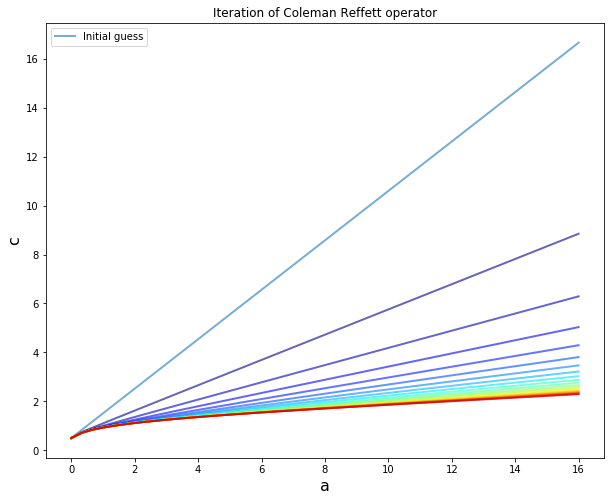

In [6]:
c_array = np.empty([len(cp.asset_grid), len(cp.z_vals)])

for i_a in range(len(cp.asset_grid)):
    for i_z in range(len(cp.z_vals)):
        c_array[i_a, i_z] = cp.R * cp.asset_grid[i_a] + cp.z_vals[i_z] + cp.b
        
num_iter = 20

i_z = 0
          
fig, ax = plt.subplots(figsize=(10,8))
xgrid = cp.asset_grid
ax.plot(xgrid, c_array[:,i_z], lw=2, alpha=0.6, label='Initial guess')
for i in range(num_iter):
    c_array = T_ColemanReffett(cp, c_array)  # Apply the Coleman Reffett operator
    ax.plot(xgrid, c_array[:,i_z], color=plt.cm.jet(i / num_iter), lw=2, alpha=0.6)
ax.set_title('Iteration of Coleman Reffett operator') 
ax.set_xlabel('a', fontsize=16)
ax.set_ylabel('c', fontsize=16)
ax.legend(loc='upper left')
plt.show()

### Fixed point of the Time iteration / Euler equation

In [7]:
def Time_Iteration(cp,            # instance of the economic environment
                   c_array,       # initial guess of policy
                   tol,           # tolerance
                   max_iter,      # maximum number of iterations
                   verbose,       # 
                   print_skip):
    ''' 
    cp is an instance of the class QE_IncomeFluctuation
    c_array is an initial guess of policy function stored on len(asset_grid) X len(shock_grid)
    '''
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        c_new = T_ColemanReffett(cp, c_array)
        error = np.max(np.abs(c_array - c_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        c_array = c_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return c_array

Error at iteration 20 is 0.020458949253354675.
Error at iteration 40 is 0.00011639473429569946.

Converged in 48 iterations.


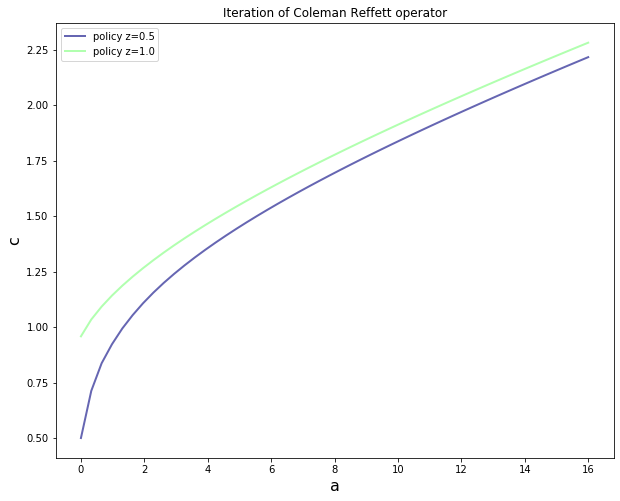

In [8]:
cp = QE_IncomeFluctuation()

c_array = np.empty([len(cp.asset_grid), len(cp.z_vals)])

for i_a in range(len(cp.asset_grid)):
    for i_z in range(len(cp.z_vals)):
        c_array[i_a, i_z] = cp.R * cp.asset_grid[i_a] + cp.z_vals[i_z] + cp.b
        

policy = Time_Iteration(cp,            # instance of the economic environment
                   c_array,            # initial guess of policy
                   tol = 1e-5,         # tolerance
                   max_iter = 100,     # maximum number of iterations
                   verbose = True,     # 
                   print_skip = 20)    # 

fig, ax = plt.subplots(figsize=(10,8))
xgrid = cp.asset_grid
#ax.plot(xgrid, c_array[:,i_z], lw=2, alpha=0.6, label='Initial guess')
for i_z in range(len(cp.z_vals)):
    ax.plot(xgrid, policy[:,i_z], color=plt.cm.jet(i_z / len(cp.z_vals)), lw=2, alpha=0.6, label='policy z=%s' %cp.z_vals[i_z])
ax.set_title('Iteration of Coleman Reffett operator') 
ax.set_xlabel('a', fontsize=16)
ax.set_ylabel('c', fontsize=16)
ax.legend(loc='upper left')
plt.show()

### Comparison of policy functions for different borrowing limits


Converged in 48 iterations.


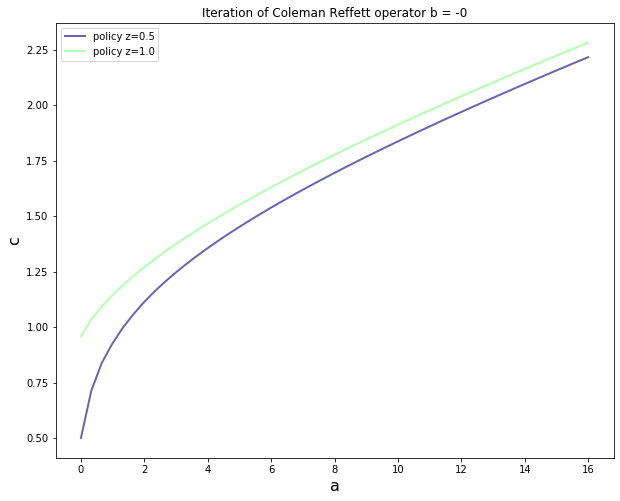


Converged in 49 iterations.


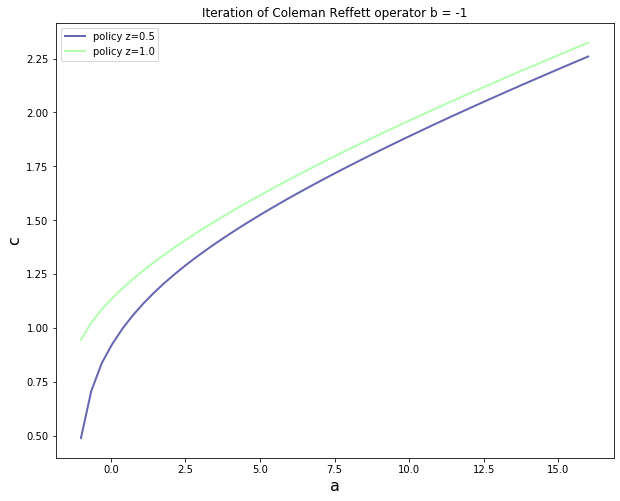

Error at iteration 50 is 0.00015047427723358098.

Converged in 61 iterations.


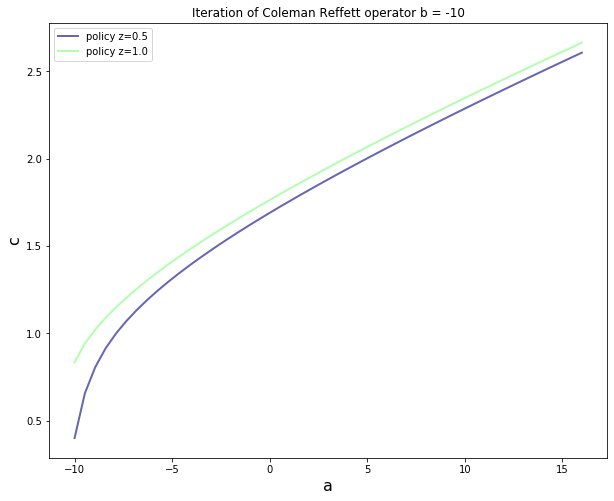

In [9]:
b_vals = [0, 1, 10]
for b_ in b_vals:
    cp = QE_IncomeFluctuation(b = b_)

    c_array = np.empty([len(cp.asset_grid), len(cp.z_vals)])

    for i_a in range(len(cp.asset_grid)):
        for i_z in range(len(cp.z_vals)):
            c_array[i_a, i_z] = cp.R * cp.asset_grid[i_a] + cp.z_vals[i_z] + cp.b
        

    policy = Time_Iteration(cp,            # instance of the economic environment
                   c_array,            # initial guess of policy
                   tol = 1e-5,         # tolerance
                   max_iter = 100,     # maximum number of iterations
                   verbose = True,     # 
                   print_skip = 50)    # 

    fig, ax = plt.subplots(figsize=(10,8))
    xgrid = cp.asset_grid
    #ax.plot(xgrid, c_array[:,i_z], lw=2, alpha=0.6, label='Initial guess')
    for i_z in range(len(cp.z_vals)):
        ax.plot(xgrid, policy[:,i_z], color=plt.cm.jet(i_z / len(cp.z_vals)), lw=2, alpha=0.6, label='policy z=%s' %cp.z_vals[i_z])
    ax.set_title('Iteration of Coleman Reffett operator b = -%s' %b_) 
    ax.set_xlabel('a', fontsize=16)
    ax.set_ylabel('c', fontsize=16)
    ax.legend(loc='upper left')
    plt.show()

### Comparison of policy functions for different interest rates

#### Exercise 1


Converged in 40 iterations.

Converged in 51 iterations.

Converged in 79 iterations.

Converged in 179 iterations.


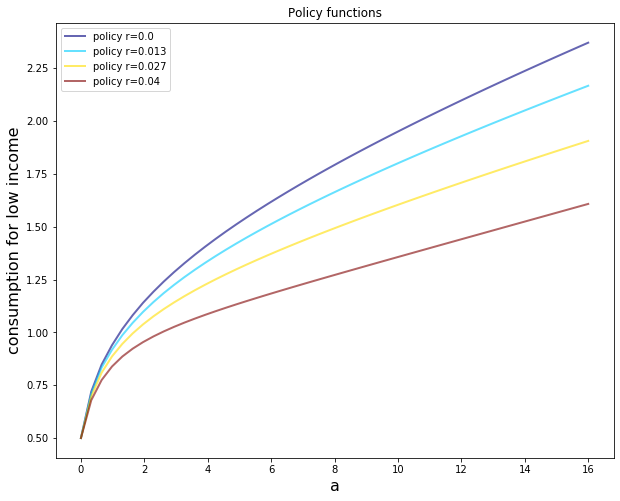

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
  
r_vals = [0.00, 0.013, 0.027, 0.04]
for r_ in r_vals:
    cp = QE_IncomeFluctuation(z_min = 0.5, b = 0, r = r_)
    xgrid = cp.asset_grid
    c_array = np.empty([len(cp.asset_grid), len(cp.z_vals)])

    for i_a in range(len(cp.asset_grid)):
        for i_z in range(len(cp.z_vals)):
            c_array[i_a, i_z] = cp.R * cp.asset_grid[i_a] + cp.z_vals[i_z] + cp.b
        

    policy = Time_Iteration(cp,            # instance of the economic environment
                   c_array,            # initial guess of policy
                   tol = 1e-5,         # tolerance
                   max_iter = 5000,     # maximum number of iterations
                   verbose = True,     # 
                   print_skip = 200)    # 

    #for i_z in range(len(cp.z_vals)):
    ax.plot(xgrid, policy[:,0], color=plt.cm.jet(r_ / max(r_vals)), lw=2, alpha=0.6, label='policy r=%s' %r_)
ax.set_title('Policy functions') 
ax.set_xlabel('a', fontsize=16)
ax.set_ylabel('consumption for low income', fontsize=16)
ax.legend(loc='upper left')

plt.show()


Converged in 57 iterations.

Converged in 110 iterations.


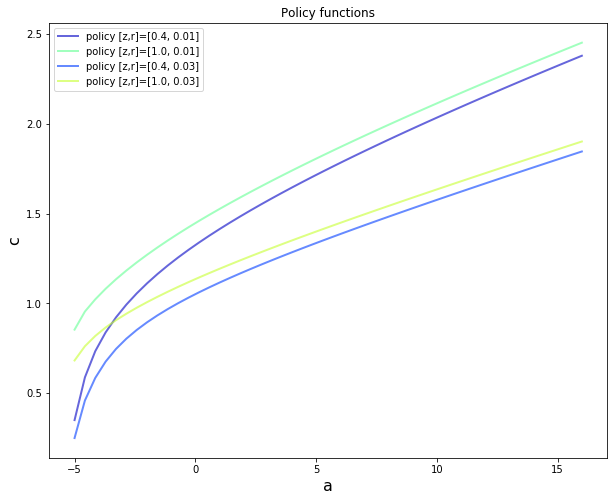

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
  
r_vals = [0.01, 0.03]
for r_ in r_vals:
    cp = QE_IncomeFluctuation(z_min = 0.4, b = 5, r = r_)
    xgrid = cp.asset_grid
    c_array = np.empty([len(cp.asset_grid), len(cp.z_vals)])

    for i_a in range(len(cp.asset_grid)):
        for i_z in range(len(cp.z_vals)):
            c_array[i_a, i_z] = cp.R * cp.asset_grid[i_a] + cp.z_vals[i_z] + cp.b
        

    policy = Time_Iteration(cp,        # instance of the economic environment
                   c_array,            # initial guess of policy
                   tol = 1e-5,         # tolerance
                   max_iter = 5000,    # maximum number of iterations
                   verbose = True,      
                   print_skip = 200)    

    #ax.plot(xgrid, c_array[:,i_z], lw=2, alpha=0.6, label='Initial guess')
    for i_z in range(len(cp.z_vals)):
        x = [cp.z_vals[i_z], r_]
        ax.plot(xgrid, policy[:,i_z], color=plt.cm.jet((2* i_z + 30 * r_) / (2* len(cp.z_vals) + 30 * max(r_vals))), lw=2, alpha=0.6, label='policy [z,r]=%s' %x)
ax.set_title('Policy functions') 
ax.set_xlabel('a', fontsize=16)
ax.set_ylabel('c', fontsize=16)
ax.legend(loc='upper left')

plt.show()

### Comparison of policy functions for different transition probabilities


Converged in 57 iterations.

Converged in 110 iterations.


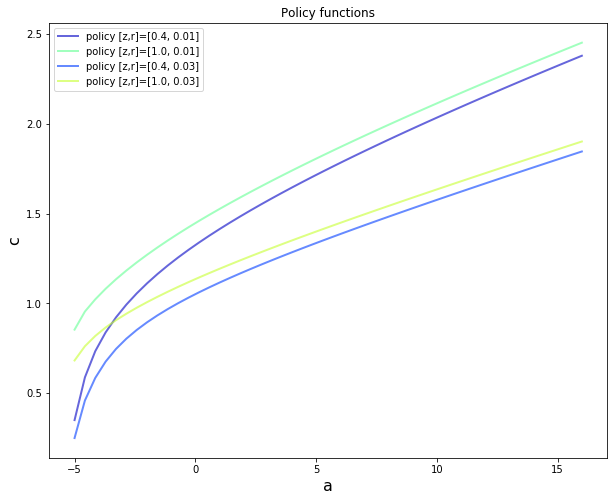


Converged in 49 iterations.

Converged in 98 iterations.


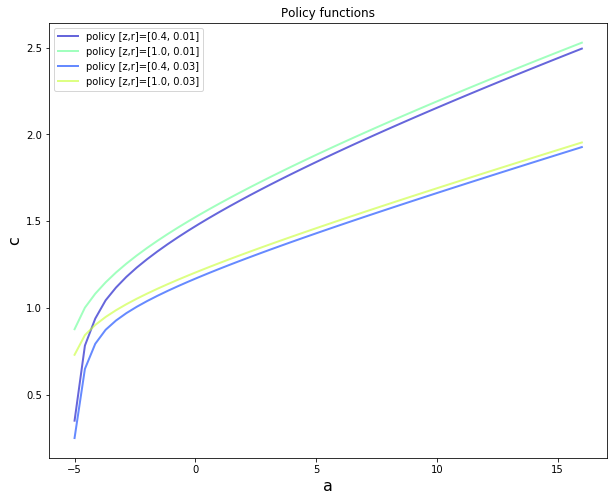

In [12]:
epsilon_vals = [0, 0.5]

for eps in epsilon_vals:
    fig, ax = plt.subplots(figsize=(10,8))
  
    r_vals = [0.01, 0.03]
    for r_ in r_vals:
        cp = QE_IncomeFluctuation(pi = ((0.6 - eps, 0.4+eps), (0.05, 0.95)), z_min = 0.4, b = 5, r = r_)
        xgrid = cp.asset_grid
        c_array = np.empty([len(cp.asset_grid), len(cp.z_vals)])

        for i_a in range(len(cp.asset_grid)):
            for i_z in range(len(cp.z_vals)):
                c_array[i_a, i_z] = cp.R * cp.asset_grid[i_a] + cp.z_vals[i_z] + cp.b
        

        policy = Time_Iteration(cp,            # instance of the economic environment
                               c_array,            # initial guess of policy
                               tol = 1e-5,         # tolerance
                               max_iter = 3000,     # maximum number of iterations
                               verbose = True,     # 
                               print_skip = 200)    # 

        for i_z in range(len(cp.z_vals)):
            x = [cp.z_vals[i_z], r_]
            ax.plot(xgrid, policy[:,i_z], color=plt.cm.jet((2* i_z + 30 * r_) / (2* len(cp.z_vals) + 30 * max(r_vals))), lw=2, alpha=0.6, label='policy [z,r]=%s' %x)
    ax.set_title('Policy functions') 
    ax.set_xlabel('a', fontsize=16)
    ax.set_ylabel('c', fontsize=16)
    ax.legend(loc='upper left')

    plt.show()

Comparison of policy functions shows that for large asset positions, the interest rate is the key determinant of saving behavior whereas for low asset positions, the realization of the shock is the key determinant of the saving behavior.

### Exercise 2

Depict policy function in terms of asset holdings and compute the stationary distribution of assets

In [13]:
def savings_pol(cp):
    '''
    savings policy defined on a grid len(asset_grid) X len(shock grid)
    '''
    c_array = np.empty([len(cp.asset_grid), len(cp.z_vals)]) # initial guess

    for i_a in range(len(cp.asset_grid)):
        for i_z in range(len(cp.z_vals)):
            c_array[i_a, i_z] = cp.R * cp.asset_grid[i_a] + cp.z_vals[i_z] + cp.b
    
    # find optimal consumption policy
    policy = Time_Iteration(cp,            # instance of the economic environment
                   c_array,            # initial guess of policy
                   tol = 1e-5,         # tolerance
                   max_iter = 5000,     # maximum number of iterations
                   verbose = False,     # True for it to print 
                   print_skip = 100)    # 
    
    # translate consumption policy into savings policy
    savings = np.empty_like(c_array)
    
    for i_a in range(len(cp.asset_grid)):
        for i_z in range(len(cp.z_vals)):
            savings[i_a, i_z] = cp.R * cp.asset_grid[i_a] + cp.z_vals[i_z] - policy[i_a, i_z]
            
    return savings

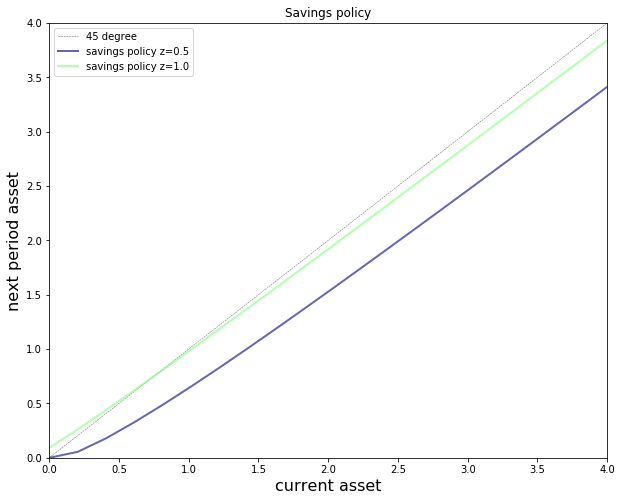

In [14]:
cp = QE_IncomeFluctuation(b = 0, r = 0.03, grid_max = 10)

fig, ax = plt.subplots(figsize=(10,8))
xgrid = cp.asset_grid
savi = savings_pol(cp)
ax.plot(xgrid, xgrid, 'k--', lw=0.5, alpha=0.6, label='45 degree')
for i_z in range(len(cp.z_vals)):
    ax.plot(xgrid, savi[:,i_z], color=plt.cm.jet(i_z / len(cp.z_vals)), lw=2, alpha=0.6, label='savings policy z=%s' %cp.z_vals[i_z])
ax.set_title('Savings policy') 
ax.set_xlabel('current asset', fontsize=16)
ax.set_ylabel('next period asset', fontsize=16)
ax.set(xlim=(-cp.b, 4), ylim=(-cp.b, 4))
ax.legend(loc='upper left')
plt.show()

By ergodicity, the long run stationary cross sectional distribution of assets is the same as the distribution of the time series.

In [15]:
def MarkovChain(M, T, s):
    """
    Generates a sample path of size T from a Markov Chain M with initial state s
    T: length of the vector obtained
    M: n by n matrix
    s: initial state
    """
    assert T > 1, 'too short a sample path, only the initial state will be reported'
    S = np.zeros(T) #collects the sample path
    S[0] = s #initial value
    (n, n) = M.shape #n denotes the number of rows/columns
    for t in range(T-1): 
        draw = np.random.uniform(0,1)
        for state in range(n):
            if s == state:
                M_s_cdf = np.cumsum(M[s,:]) #CDF for the distribution given s
                if draw <= M_s_cdf[0]:
                    s = 0
                for j in range(n-1):
                    if draw <= M_s_cdf[j+1] and draw > M_s_cdf[j]:
                        s = j+1
        S[t+1] = s
    return S

In [16]:
N = 40
p = 0.5
q = 0.5
s = 1
n = 2
M = np.empty((n,n))
M[0,0] = p
M[0,1] = 1-p
M[1,0] = q
M[1,1] = 1-q

S_2 = MarkovChain(M, N, s)

PropH2 = sum(S_2) / (N)

print(M)
print(S_2)
print(1 - PropH2), 'Proportion of time spent in state 1 for MarkovChain'

[[0.5 0.5]
 [0.5 0.5]]
[1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
0.525


(None, 'Proportion of time spent in state 1 for MarkovChain')

In [17]:
cp = QE_IncomeFluctuation(pi = ((0.9, 0.1),
                       (0.1, 0.9)), r = 0.04, grid_max = 4)
T = 80
s = 1

sample_Z = MarkovChain(cp.pi, T, s)

print(sample_Z)
Prop = sum(sample_Z) / (T)
print(Prop)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
0.45


In [18]:
def savings_sample_path(cp, i_z_path):
    '''
    Z denotes the sample path of shocks
    '''
    saving_path = np.empty(len(i_z_path) + 1)
    savings_policy = savings_pol(cp) #optimal savings policy
    savings_interpo = lambda a, i_z: interp(cp.asset_grid, savings_policy[:,i_z], a)
    saving_path[0] = 3
    for i in range(len(i_z_path)):
        saving_path[i+1] = savings_interpo(saving_path[i], int(i_z_path[i]))
    return saving_path

In [19]:
cp = QE_IncomeFluctuation(r = 0.03, grid_max = 4)
T = 50
s = 1

sample_Z = MarkovChain(cp.pi, T, s)

print(cp.pi)

[[0.6  0.4 ]
 [0.05 0.95]]


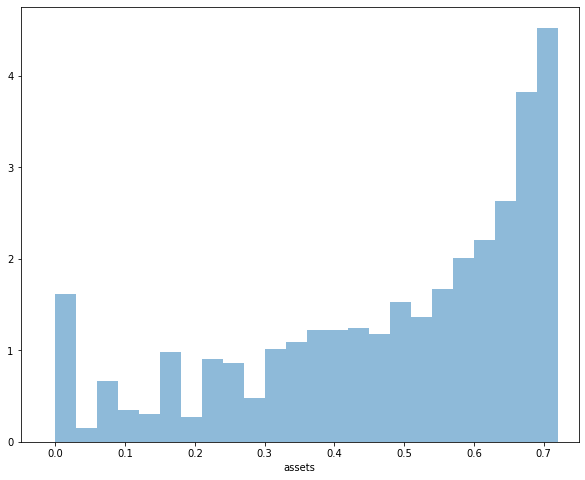

In [20]:
cp = QE_IncomeFluctuation(r = 0.03, grid_max = 4)
T = 500000
s = 1

sample_Z = MarkovChain(cp.pi, T, s)
savings_cp = savings_sample_path(cp, sample_Z)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(xlabel='assets', xlim=(-0.05, 0.75))
ax.hist(savings_cp, density=True, bins=100, alpha=0.5)
plt.show()

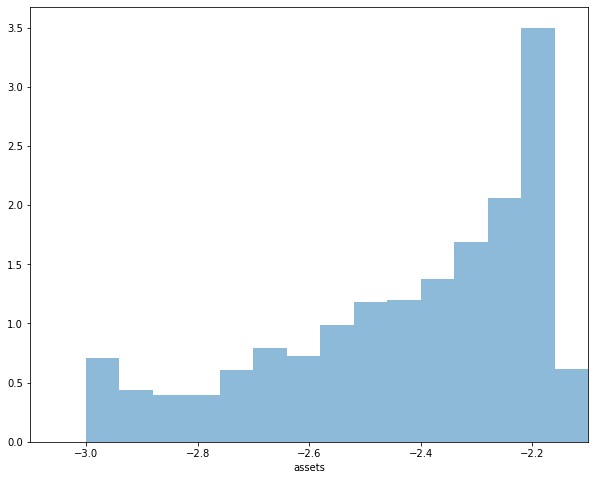

In [21]:
cp_1 = QE_IncomeFluctuation(b = 3, r = 0.03, grid_max = 4)
T = 500000
s = 1

sample_Z_1 = MarkovChain(cp_1.pi, T, s)
savings_cp_1 = savings_sample_path(cp_1, sample_Z)

fig_1, ax_1 = plt.subplots(figsize=(10, 8))
ax_1.set(xlabel='assets', xlim=(-3.1, -2.1))
ax_1.hist(savings_cp_1, density=True, bins=100, alpha=0.5)
plt.show()

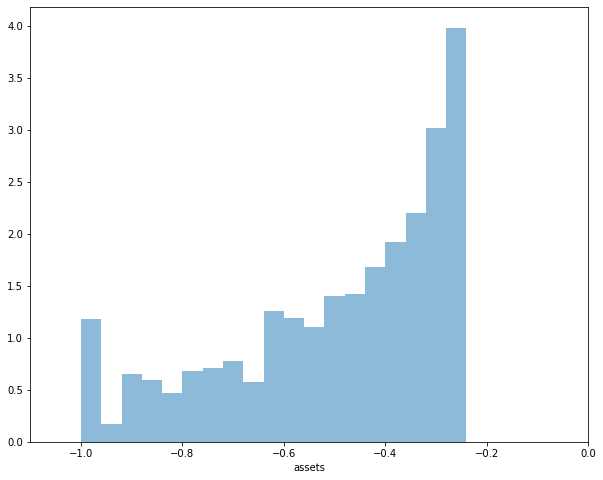

In [22]:
cp_1 = QE_IncomeFluctuation(b = 1, r = 0.03, grid_max = 4)
T = 500000
s = 1

sample_Z_1 = MarkovChain(cp_1.pi, T, s)
savings_cp_1 = savings_sample_path(cp_1, sample_Z)

fig_1, ax_1 = plt.subplots(figsize=(10, 8))
ax_1.set(xlabel='assets', xlim=(-(cp_1.b +0.1), -(cp_1.b -1)))
ax_1.hist(savings_cp_1, density=True, bins=100, alpha=0.5)
plt.show()

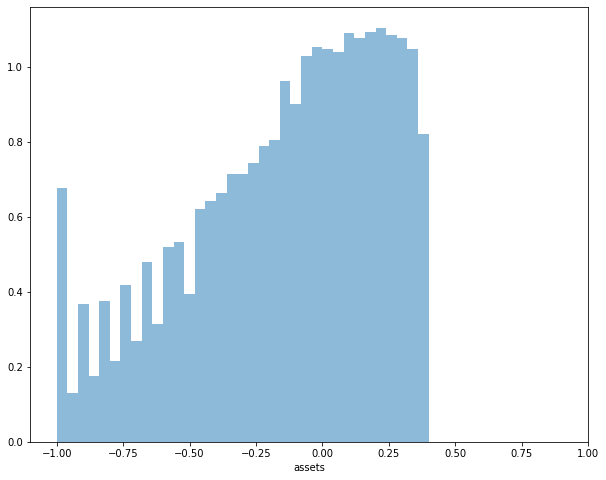

In [23]:
cp_1 = QE_IncomeFluctuation(b = 1, r = 0.035, grid_max = 4)
T = 500000
s = 1

sample_Z_1 = MarkovChain(cp_1.pi, T, s)
savings_cp_1 = savings_sample_path(cp_1, sample_Z)

fig_1, ax_1 = plt.subplots(figsize=(10, 8))
ax_1.set(xlabel='assets', xlim=(-(cp_1.b +0.1), -(cp_1.b -2)))
ax_1.hist(savings_cp_1, density=True, bins=100, alpha=0.5)
plt.show()

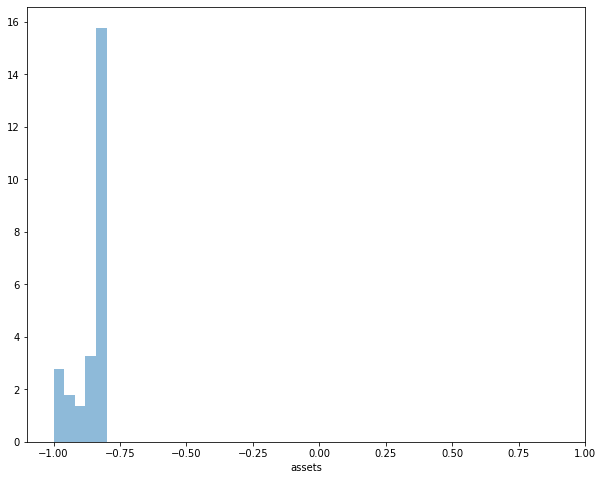

In [24]:
cp_1 = QE_IncomeFluctuation(b = 1, r = 0.015, grid_max = 4)
T = 500000
s = 1

sample_Z_1 = MarkovChain(cp_1.pi, T, s)
savings_cp_1 = savings_sample_path(cp_1, sample_Z)

fig_1, ax_1 = plt.subplots(figsize=(10, 8))
ax_1.set(xlabel='assets', xlim=(-(cp_1.b +0.1), -(cp_1.b -2)))
ax_1.hist(savings_cp_1, density=True, bins=100, alpha=0.5)
plt.show()

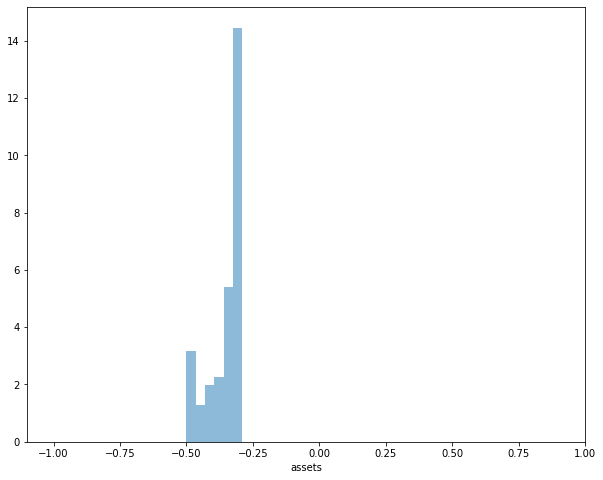

In [25]:
cp_1 = QE_IncomeFluctuation(b = 0.5, r = 0.015, grid_max = 4)
T = 500000
s = 1

sample_Z_1 = MarkovChain(cp_1.pi, T, s)
savings_cp_1 = savings_sample_path(cp_1, sample_Z)

fig_1, ax_1 = plt.subplots(figsize=(10, 8))
ax_1.set(xlabel='assets', xlim=(-(1 +0.1), -(1 -2)))
ax_1.hist(savings_cp_1, density=True, bins=100, alpha=0.5)
plt.show()

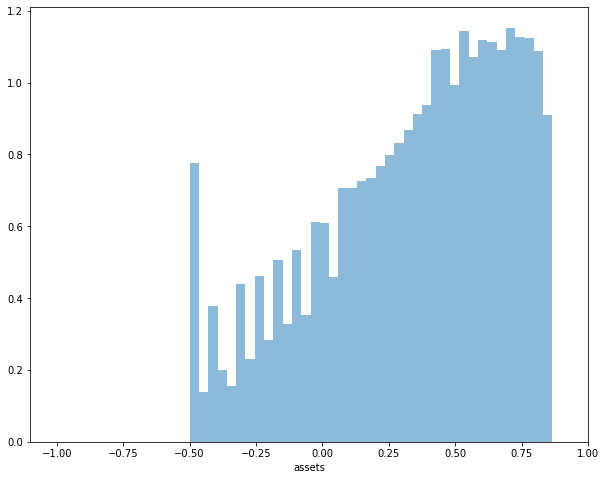

In [26]:
cp_1 = QE_IncomeFluctuation(b = 0.5, r = 0.035, grid_max = 4)
T = 500000
s = 1

sample_Z_1 = MarkovChain(cp_1.pi, T, s)
savings_cp_1 = savings_sample_path(cp_1, sample_Z)

fig_1, ax_1 = plt.subplots(figsize=(10, 8))
ax_1.set(xlabel='assets', xlim=(-(1 +0.1), -(1 -2)))
ax_1.hist(savings_cp_1, density=True, bins=100, alpha=0.5)
plt.show()

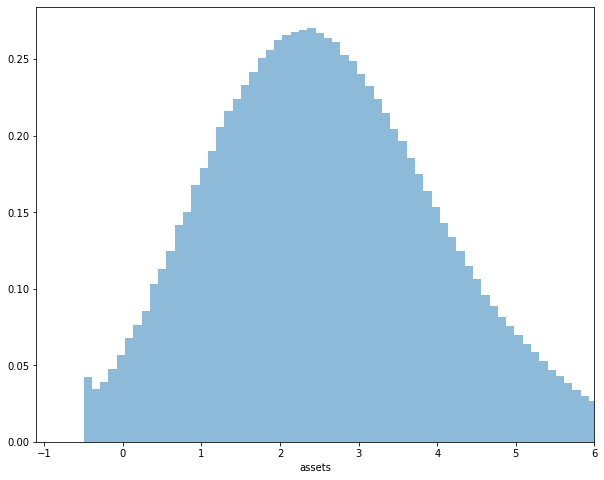

In [27]:
cp_1 = QE_IncomeFluctuation(b = 0.5, r = (1/0.96 - 1.001), grid_max = 10)
T = 500000
s = 1

sample_Z_1 = MarkovChain(cp_1.pi, T, s)
savings_cp_1 = savings_sample_path(cp_1, sample_Z)

fig_1, ax_1 = plt.subplots(figsize=(10, 8))
ax_1.set(xlabel='assets', xlim=(-(1 +0.1), -(1 -7)))
ax_1.hist(savings_cp_1, density=True, bins=100, alpha=0.5)
plt.show()

### Exercise 3: aggregate savings

Finished iteration b = 1
Finished iteration b = 3


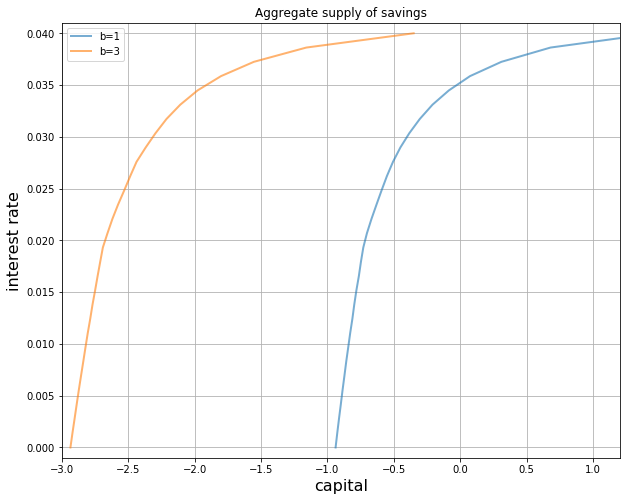

In [28]:
x_grid_size = 30

fig, ax = plt.subplots(figsize=(10,8))

b_vals = np.array([1, 3])
r_vals = np.linspace(0, 0.04, x_grid_size)

T = 250000
s = 1
agg_savings = np.empty(x_grid_size)
for b_ in b_vals:
    i = 0
    for r_ in r_vals:
        cp = QE_IncomeFluctuation(r = r_, b = b_)
        sample_Z = MarkovChain(cp.pi, T, s)
        average_savings = savings_sample_path(cp, sample_Z)
        agg_savings[i] = np.mean(average_savings)
        i = i+1
    print(f"Finished iteration b = {b_:d}")
    ax.plot(agg_savings, r_vals, lw=2, alpha=0.6, label='b=%s' %b_)

ax.set_title('Aggregate supply of savings') 
ax.set_xlabel('capital', fontsize=16)
ax.set_ylabel('interest rate', fontsize=16)
ax.set(xlim=(-max(b_vals), 1.2), ylim=(-0.001, 0.041))
ax.grid()
ax.legend(loc='upper left')
plt.show()